In [1]:
import pickle

# credits.pickle

In [2]:
with open('credits.pickle', 'rb') as f:
    credits_df = pickle.load(f)

credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [5]:
print("castの情報（dict型）", type(credits_df.cast[0][0]))
print(credits_df.cast[0][0])

castの情報（dict型） <class 'dict'>
{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}


In [8]:
print("crewの情報(dict型)", type(credits_df.crew[0][0]))
print(credits_df.crew[0][0])

crewの情報(dict型) <class 'dict'>
{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}


# keywords.pickle

In [10]:
with open('keywords.pickle', 'rb') as f:
    keywords_df = pickle.load(f)

keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [11]:
print("keywordsの情報（dict型）", type(keywords_df.keywords[0][0]))
print(keywords_df.keywords[0][0])

keywordsの情報（dict型） <class 'dict'>
{'id': 931, 'name': 'jealousy'}


# links.pickle

In [12]:
with open('links.pickle', 'rb') as f:
    links_df = pickle.load(f)

links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


# movie_metadata.pickle

In [13]:
with open('movie_metadata.pickle', 'rb') as f:
    metadata_df = pickle.load(f)

metadata_df.head()

,budget,genres,id,original_language,original_title,release_date,revenue,spoken_languages,title,vote_average,vote_count,collection
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,Toy Story Collection
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,no collection
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,1995-12-22,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,no collection
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,1995-02-10,76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,Father of the Bride Collection


In [14]:
print("genresの情報（dict型）", type(metadata_df.genres[0][0]))
print(metadata_df.genres[0][0])
print("spoken_languagesの情報（dict型）", type(metadata_df.spoken_languages[0][0]))
print(metadata_df.spoken_languages[0][0])

genresの情報（dict型） <class 'dict'>
{'id': 16, 'name': 'Animation'}
spoken_languagesの情報（dict型） <class 'dict'>
{'iso_639_1': 'en', 'name': 'English'}


# 上映言語数と、興行収入の相関

In [24]:
metadata_df["lang_len"] = metadata_df["spoken_languages"].map(len)
metadata_df.head()

,budget,genres,id,original_language,original_title,release_date,revenue,spoken_languages,title,vote_average,vote_count,collection,lang_len
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,Toy Story Collection,1
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,no collection,2
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,1
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,1995-12-22,81452156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,no collection,1
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,1995-02-10,76578911.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,1


In [30]:
metadata_df["revenue"].count()

45365

In [39]:
metadata_df[metadata_df.revenue > 0]["revenue"].count()

7407

In [41]:
metadata_df[metadata_df.budget > 0]["budget"].count()

8886

In [42]:
metadata_df[metadata_df.revenue > 0][metadata_df.budget > 0]["budget"].count()

/Users/labuser/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


5381

# 予算、興行収入の時系列分析

In [90]:
movie_money_df = metadata_df[metadata_df.revenue > 0][["release_date", "budget", "revenue", "title"]]
movie_money_df = movie_money_df[movie_money_df.budget > 0]
movie_money_df.head()

,release_date,budget,revenue,title
0,1995-10-30,30000000,373554033.0,Toy Story
1,1995-12-15,65000000,262797249.0,Jumanji
3,1995-12-22,16000000,81452156.0,Waiting to Exhale
5,1995-12-15,60000000,187436818.0,Heat
8,1995-12-22,35000000,64350171.0,Sudden Death


In [49]:
import datetime

def str_to_date(string):
    tstr = string
    tdatetime = datetime.datetime.strptime(tstr, '%Y-%m-%d')
    tdate = datetime.date(tdatetime.year, tdatetime.month, tdatetime.day)
    return tdate

In [62]:
def str_to_year(string):
    tstr = string
    tdatetime = datetime.datetime.strptime(tstr, '%Y-%m-%d')
    return tdatetime.year

In [91]:
movie_money_df["year"] = movie_money_df["release_date"].map(str_to_year)
movie_money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5381 entries, 0 to 45422
Data columns (total 5 columns):
release_date    5381 non-null object
budget          5381 non-null int64
revenue         5381 non-null float64
title           5381 non-null object
year            5381 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 252.2+ KB


In [94]:
movie_money_df = movie_money_df.sort_values(by="year")
movie_money_df.head()

,release_date,budget,revenue,title,year
6913,1915-02-08,100000,11000000.0,The Birth of a Nation,1915
8293,1915-12-13,17311,137365.0,The Cheat,1915
13003,1916-12-24,200000,8000000.0,"20,000 Leagues Under the Sea",1916
35914,1918-08-01,250000,8000000.0,Mickey,1918
3192,1921-01-21,250000,2500000.0,The Kid,1921


In [96]:
yearly_revenue = movie_money_df.groupby("year")[["budget", "revenue"]].mean()

In [103]:
yearly_movies = movie_money_df.groupby("year")[["title"]].count()
yearly_movies.head()

,title
year,
1915,2
1916,1
1918,1
1921,1
1922,1


In [73]:
import matplotlib.pyplot as plt

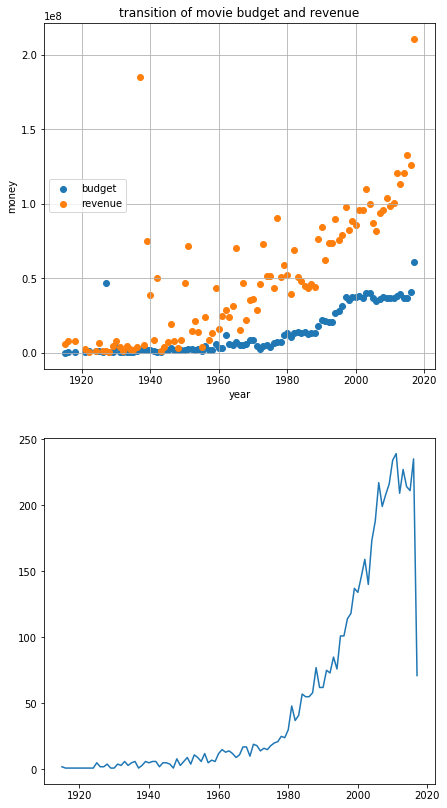

In [108]:
%matplotlib inline

fig = plt.figure(figsize=(7,14))

ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax.scatter(yearly_revenue.index, yearly_revenue['budget'])
ax.scatter(yearly_revenue.index, yearly_revenue['revenue'])

ax.set_title('transition of movie budget and revenue')
ax.set_xlabel('year')
ax.set_ylabel('money')

ax.grid(True)

ax.legend(loc='center left')

left = yearly_movies.index
height = yearly_movies.title
ax2.plot(left, height)


plt.show()

In [50]:
movie_money_df["date"] = movie_money_df["release_date"].map(str_to_date)
print(type(movie_money_df.date[0]))
movie_money_df.head()

<class 'datetime.date'>


,release_date,budget,revenue,date
0,1995-10-30,30000000,373554033.0,1995-10-30
1,1995-12-15,65000000,262797249.0,1995-12-15
3,1995-12-22,16000000,81452156.0,1995-12-22
5,1995-12-15,60000000,187436818.0,1995-12-15
8,1995-12-22,35000000,64350171.0,1995-12-22


In [59]:
movie_money_df = movie_money_df.sort_values(by=["date"], ascending=False)
movie_money_df.head()

,release_date,budget,revenue,date
44282,2017-08-04,21000000,24527158.0,2017-08-04
45167,2017-08-03,11000000,184770205.0,2017-08-03
45014,2017-08-03,60000000,71000000.0,2017-08-03
45139,2017-07-28,50000000,66913939.0,2017-07-28
44632,2017-07-26,30000000,90007945.0,2017-07-26
